<a href="https://colab.research.google.com/github/LyaRB/SenalesySistemas/blob/main/Transformada%20de%20Laplace/An%C3%A1lisis_de_redes_RLC_paralelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

In [3]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1/s # Fuente de corriente en AC, función seno
X = sym.Function('X')(s)
#función de salida Y(s) = H(s)X(s
Y = 1/(L*C*s**2 + (L/R)*s + 1) * X
Y

      X(s)      
────────────────
     2   L⋅s    
C⋅L⋅s  + ─── + 1
          R     

In [4]:
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s), s, t)#recuerde que puede aplicar fracciones parciales para facilitar los cálculos
y

         -5⋅t                                
         ─────                               
           4      ⎛√55⋅t⎞    -5⋅t            
    √55⋅ℯ     ⋅sin⎜─────⎟    ─────           
                  ⎝  4  ⎠      4      ⎛√55⋅t⎞
1 - ───────────────────── - ℯ     ⋅cos⎜─────⎟
              11                      ⎝  4  ⎠

In [5]:
#función de salida en Laplace factorizada
YS = y.simplify()
YS

⎛ 5⋅t          ⎛√55⋅t⎞             ⎞  -5⋅t 
⎜ ───   √55⋅sin⎜─────⎟             ⎟  ─────
⎜  4           ⎝  4  ⎠      ⎛√55⋅t⎞⎟    4  
⎜ℯ    - ────────────── - cos⎜─────⎟⎟⋅ℯ     
⎝             11            ⎝  4  ⎠⎠       

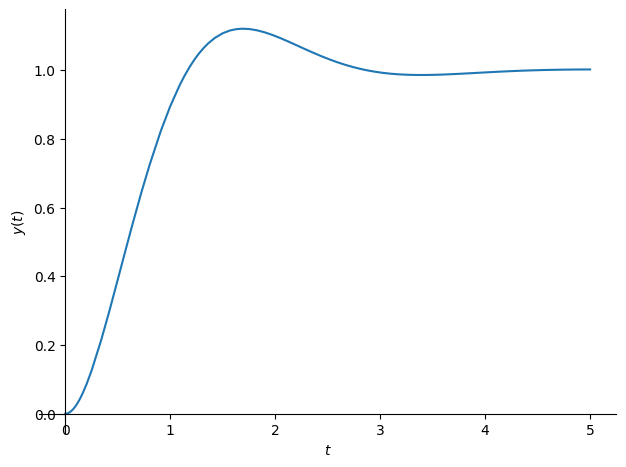

In [6]:
sym.plot(YS, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

In [7]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + (L/R)*s + 1) * y0 + L / (L*C*s**2 + (L/R)*s + 1) * i0
Yint

      L⋅i₀         y₀⋅(C⋅L⋅s + C⋅R)
──────────────── + ────────────────
     2   L⋅s            2   L⋅s    
C⋅L⋅s  + ─── + 1   C⋅L⋅s  + ─── + 1
          R                  R     

In [10]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 0).subs(y0, -1), s, t) #transformada inversa para los valores iniciales
yint

         -5⋅t                                
         ─────                               
           4      ⎛√55⋅t⎞    -5⋅t            
  3⋅√55⋅ℯ     ⋅sin⎜─────⎟    ─────           
                  ⎝  4  ⎠      4      ⎛√55⋅t⎞
- ─────────────────────── - ℯ     ⋅cos⎜─────⎟
             55                       ⎝  4  ⎠

In [11]:
y = y + yint
y.simplify()

⎛ 5⋅t            ⎛√55⋅t⎞               ⎞  -5⋅t 
⎜ ───   8⋅√55⋅sin⎜─────⎟               ⎟  ─────
⎜  4             ⎝  4  ⎠        ⎛√55⋅t⎞⎟    4  
⎜ℯ    - ──────────────── - 2⋅cos⎜─────⎟⎟⋅ℯ     
⎝              55               ⎝  4  ⎠⎠       

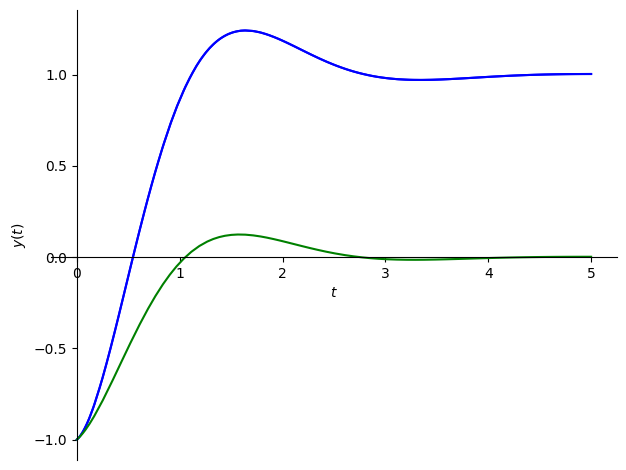

In [12]:
p1 = sym.plot(y, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p1.extend(p1)
p1.extend(p2)
p1.show()